In [2]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import time
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [3]:
#store = pd.HDFStore('X_pca.h5')
#X_pca = store['X_pca']

store = pd.HDFStore('X_pca.h5')
X_pca = store['X_pca']

store = pd.HDFStore('X_mob.h5')
X_mob = store['X_mob']


store = pd.HDFStore('y_default.h5')
y_default = store['y_default']

store = pd.HDFStore('y_prepay.h5')
y_prepay = store['y_prepay']

X_pca = X_pca.join(X_mob)

In [4]:
X_pca_add = X_pca[ X_pca['mob']>1].copy()
X_pca_add['mob'] = np.ceil(X_pca_add['mob']/2)
X_pca = pd.concat([X_pca, X_pca_add])

zeros = pd.DataFrame(np.zeros(X_pca_add.shape[0]))
y_default = pd.concat([y_default,zeros])
y_prepay = pd.concat([y_prepay,zeros])

In [6]:
X_pca_add = X_pca[ X_pca['mob']>10].copy()
X_pca_add['mob'] = np.ceil(X_pca_add['mob']/10)
X_pca = pd.concat([X_pca, X_pca_add])

zeros = pd.DataFrame(np.zeros(X_pca_add.shape[0]))
y_default = pd.concat([y_default,zeros])
y_prepay = pd.concat([y_prepay,zeros])

In [7]:
trainX, testX, trainy, testy = train_test_split(X_pca, y_default, test_size=0.2, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Iteration 1, loss = 0.13358978
Iteration 2, loss = 0.13115986
Iteration 3, loss = 0.13068601
Iteration 4, loss = 0.13022523
Iteration 5, loss = 0.13001064
Iteration 6, loss = 0.12984596
Iteration 7, loss = 0.12968079
Iteration 8, loss = 0.12955794
Iteration 9, loss = 0.12943539
Iteration 10, loss = 0.12937292
Iteration 11, loss = 0.12928654
Iteration 12, loss = 0.12920034
Iteration 13, loss = 0.12917874
Iteration 14, loss = 0.12907991
Iteration 15, loss = 0.12903050
Iteration 16, loss = 0.12898987
Iteration 17, loss = 0.12891174
Iteration 18, loss = 0.12888533
Iteration 19, loss = 0.12885776
Iteration 20, loss = 0.12880384
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
No Skill: ROC AUC=0.500
MLPClassifier: ROC AUC=0.853


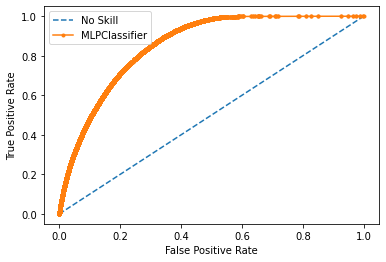

1692.1929202079773 s


In [8]:
time_start = time.time()
model = MLPClassifier(hidden_layer_sizes=(128, 32, 32, 128), max_iter=30, early_stopping=False, learning_rate_init=0.001, verbose=True)
model.fit(trainX, trainy)
time_end = time.time()

# save the model to disk
filename = 'nn_model_default.sav'
#filename = 'nn_model_date_default.sav'

pickle.dump(model, open(filename, 'wb'))
model = pickle.load(open(filename, 'rb'))

lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('MLPClassifier: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='MLPClassifier')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

print (time_end - time_start, "s")

In [9]:
trainX, testX, trainy, testy = train_test_split(X_pca, y_prepay, test_size=0.2, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Iteration 1, loss = 0.31648797
Iteration 2, loss = 0.30908063
Iteration 3, loss = 0.30701479
Iteration 4, loss = 0.30594069
Iteration 5, loss = 0.30516056
Iteration 6, loss = 0.30409711
Iteration 7, loss = 0.30380492
Iteration 8, loss = 0.30274388
Iteration 9, loss = 0.30224488
Iteration 10, loss = 0.30168823
Iteration 11, loss = 0.30125771
Iteration 12, loss = 0.30098380
Iteration 13, loss = 0.30068503
Iteration 14, loss = 0.30048383
Iteration 15, loss = 0.30025950
Iteration 16, loss = 0.29998437
Iteration 17, loss = 0.29981140
Iteration 18, loss = 0.29962761
Iteration 19, loss = 0.29962873
Iteration 20, loss = 0.29941770
Iteration 21, loss = 0.29938921
Iteration 22, loss = 0.29943450
Iteration 23, loss = 0.29920772
Iteration 24, loss = 0.29900372
Iteration 25, loss = 0.29904094
Iteration 26, loss = 0.29893424
Iteration 27, loss = 0.29880169
Iteration 28, loss = 0.29863342
Iteration 29, loss = 0.29852146
Iteration 30, loss = 0.29858516


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


No Skill: ROC AUC=0.500
MLPClassifier: ROC AUC=0.798


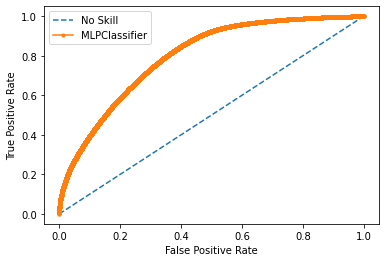

2352.5929107666016 s


In [11]:
time_start = time.time()
model = MLPClassifier(hidden_layer_sizes=(128, 32, 32, 128), max_iter=30, early_stopping=False, learning_rate_init=0.001, verbose=True)
model.fit(trainX, trainy)

time_end = time.time()

filename = 'nn_model_prepay.sav'
#filename = 'nn_model_date_prepay.sav'

pickle.dump(model, open(filename, 'wb'))
model = pickle.load(open(filename, 'rb'))

lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('MLPClassifier: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='MLPClassifier')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

print (time_end - time_start, "s")